# **Module**: Univariate Statistical Process Monitoring
## **Lecture**: Industrial application of EWMA control chart
### *Topic*:  EWMA control chart-based monitoring of aeration tank

In [31]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# ==================================================================================
#                        Read and explore dataset
# ==================================================================================

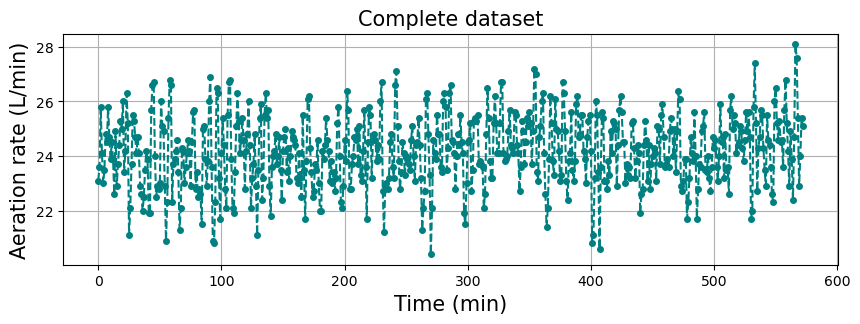

In [33]:
# read data
data = np.loadtxt('aeration-rate.csv', skiprows=1)

# plots
plt.figure(figsize=(10,3))
plt.plot(data,'--',marker='o', markersize=4, color='teal')
plt.xlabel('Time (min)', fontsize=15), plt.ylabel('Aeration rate (L/min)', fontsize=15)
plt.title('Complete dataset', fontsize=15)
plt.grid()
plt.show()

In [34]:
# ==================================================================================
#                                    Model Training
# ==================================================================================

> ##### we will use the first 200 samples as NOC data to estimate the EWMA control chart parameters, which are the mean (mu) and standard deviation (sigma) of the signal, and the Control limits

In [35]:
# fetch NOC data
N = 200
x_faultFree = data[:N]

In [36]:
# estimate EWMA model parameters
mu, sigma = np.mean(x_faultFree), np.std(x_faultFree)
lambda_value = 0.2
LCL = mu - 3*sigma*np.sqrt(lambda_value/(2-lambda_value))
UCL = mu + 3*sigma*np.sqrt(lambda_value/(2-lambda_value))

print(f'EWMA chart control limit: UCL={UCL} and LCL={LCL}')

EWMA chart control limit: UCL=25.308735678201607 and LCL=22.581264321798393


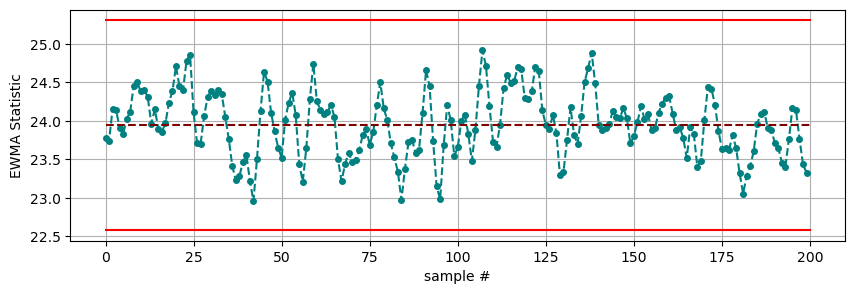

In [37]:
# compute EWMA statistic for NOC data
z = np.zeros((N,))
z0 = mu

for i in range(N):
    if i==0:
        z[i] = lambda_value*x_faultFree[i] + (1-lambda_value)*z0
    else:
        z[i] = lambda_value*x_faultFree[i] + (1-lambda_value)*z[i-1]

# plot control chart for NOC data
plt.figure(figsize=(10,3))
plt.plot(z,'--',marker='o', markersize=4, color='teal')
plt.plot([0,N],[LCL,LCL], color='red'), plt.plot([0,N],[UCL,UCL], color='red')
plt.plot([0,N],[mu,mu], '--', color='maroon')
plt.xlabel('sample #'), plt.ylabel('EWMA Statistic')
plt.grid()
plt.show()

In [38]:
# ==================================================================================
#               Fetch test samples and plot on control chart
# ==================================================================================

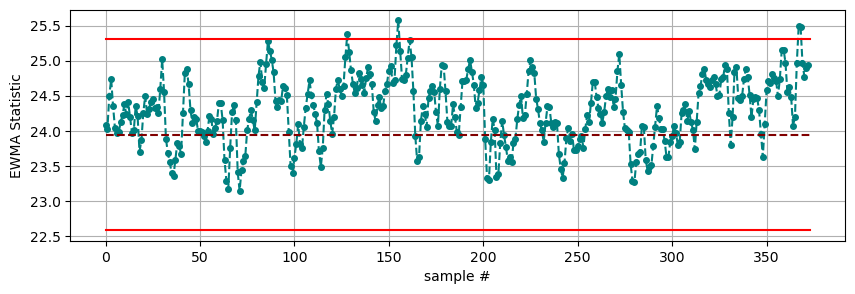

In [39]:
# test data
x_test = data[200:]
N_test = len(x_test)

# EWMA statistic for faulty data
z_test = np.zeros((N_test,))

for i in range(N_test):
    if i==0:
        z_test[i] = lambda_value*x_test[i] + (1-lambda_value)*z0
    else:
        z_test[i] = lambda_value*x_test[i] + (1-lambda_value)*z_test[i-1]

# control chart for test data
plt.figure(figsize=(10,3))
plt.plot(z_test,'--',marker='o', markersize=4, color='teal')
plt.plot([0,N_test],[LCL,LCL], color='red'), plt.plot([0,N_test],[UCL,UCL], color='red')
plt.plot([0,N_test],[mu,mu], '--', color='maroon')
plt.xlabel('sample #'), plt.ylabel('EWMA Statistic')
plt.grid()
plt.show()